
File: H2O
Shape of the NMR data: (12000, 2)
First few rows of the data:
[[0.0000e+00 1.4616e-02]
 [5.0000e-06 8.1520e-03]
 [1.0000e-05 8.0080e-03]
 [1.5000e-05 7.8040e-03]
 [2.0000e-05 7.7650e-03]]


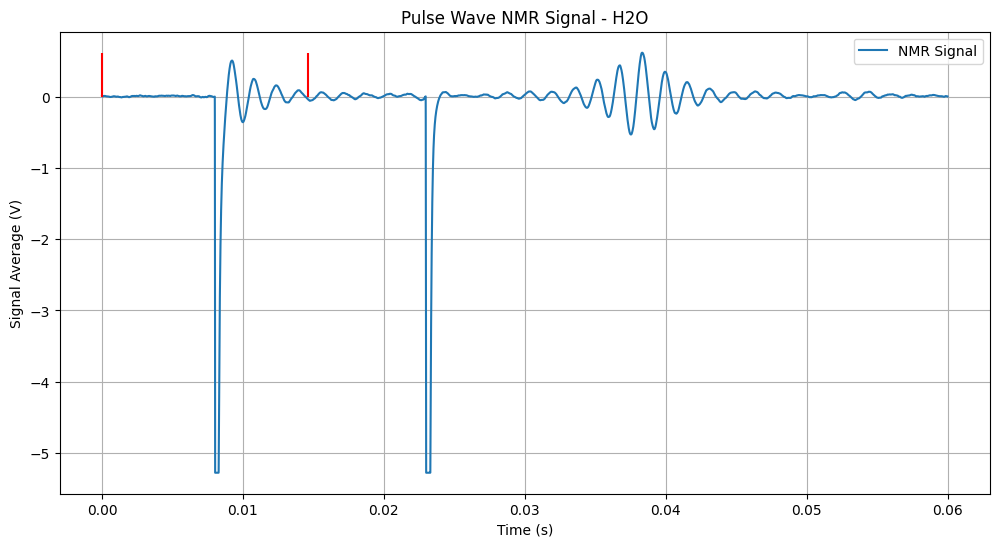


File: Glycerin
Shape of the NMR data: (12000, 2)
First few rows of the data:
[[0.0000e+00 1.8527e-02]
 [5.0000e-06 1.2650e-02]
 [1.0000e-05 1.3143e-02]
 [1.5000e-05 1.3818e-02]
 [2.0000e-05 1.4381e-02]]


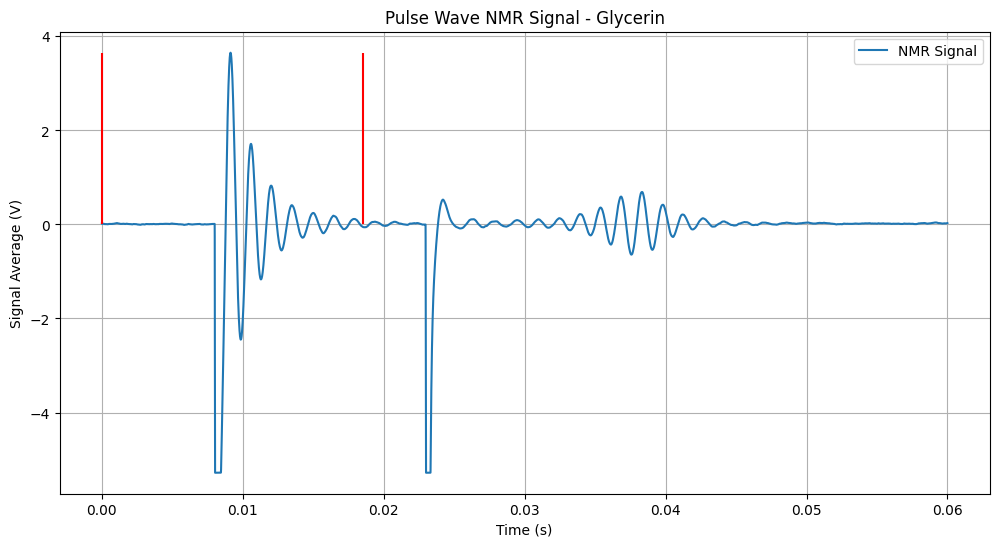


File: Mn 1 lock in
Shape of the NMR data: (11790, 2)
First few rows of the data:
[[0.       0.903164]
 [0.05     0.909932]
 [0.1      0.90961 ]
 [0.15     0.908965]
 [0.2      0.910577]]


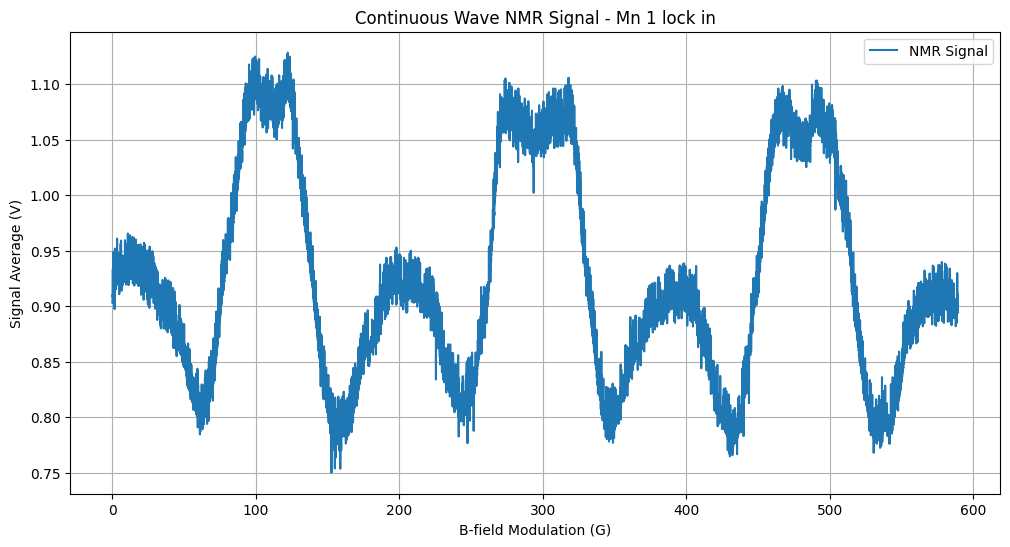


File: Mn 0.01 lock in
Shape of the NMR data: (12085, 2)
First few rows of the data:
[[0.       0.953442]
 [0.05     0.930237]
 [0.1      0.924758]
 [0.15     0.92927 ]
 [0.2      0.927336]]


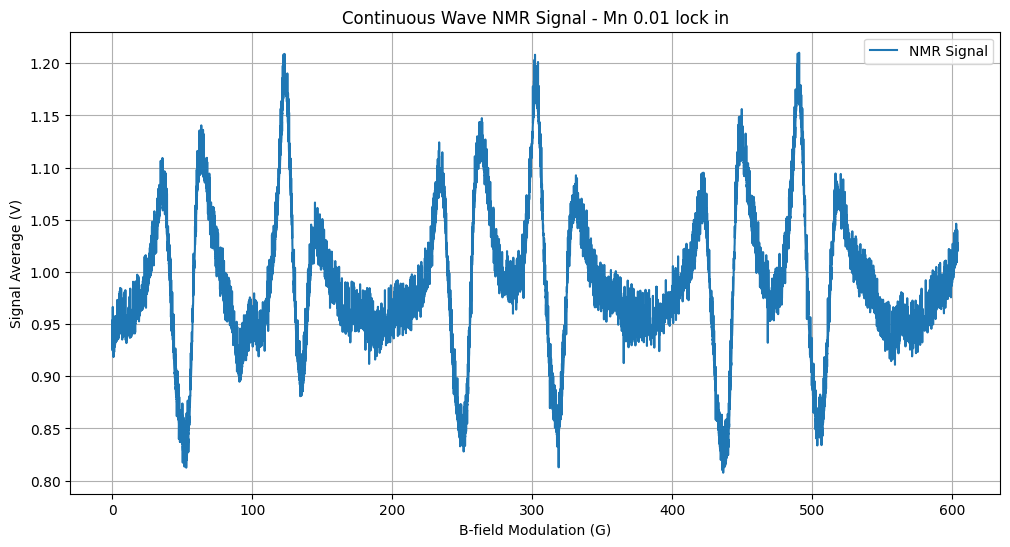


File: Mn 3.3 lock in
Shape of the NMR data: (13035, 2)
First few rows of the data:
[[320.25      -0.637088]
 [320.3       -0.661099]
 [320.35      -0.660777]
 [320.4       -0.660615]
 [320.45      -0.661905]]


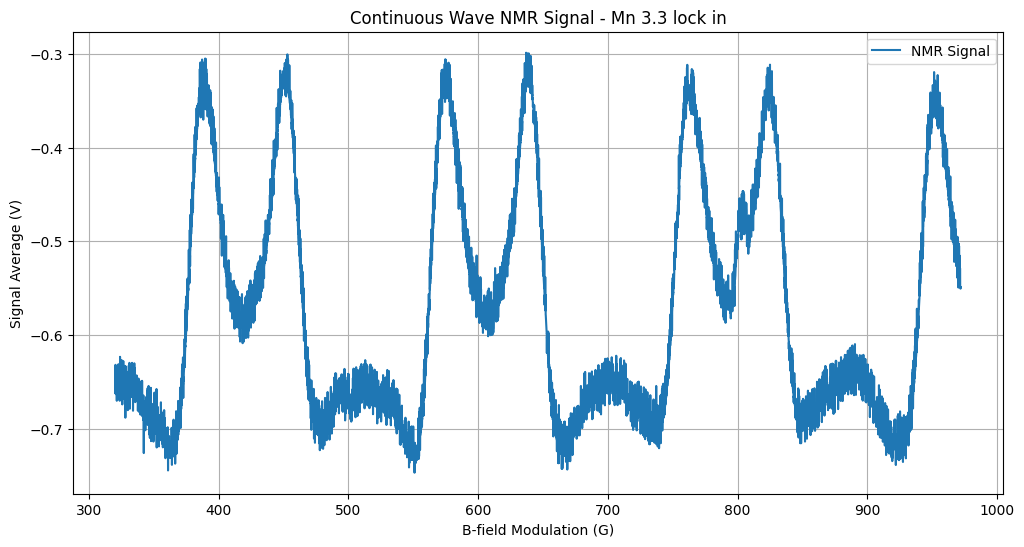


File: Mn 0.03 lock in
Shape of the NMR data: (12055, 2)
First few rows of the data:
[[0.       0.543158]
 [0.05     0.545898]
 [0.1      0.545253]
 [0.15     0.545414]
 [0.2      0.544125]]


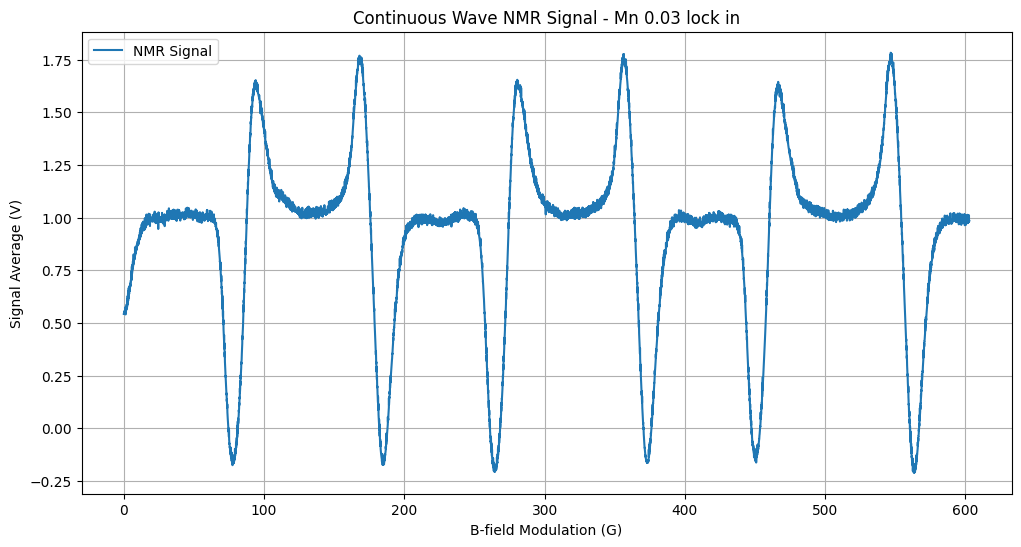


File: Mn 0.3 lock in
Shape of the NMR data: (11640, 2)
First few rows of the data:
[[0.       0.923146]
 [0.05     0.882859]
 [0.1      0.881248]
 [0.15     0.880442]
 [0.2      0.876897]]


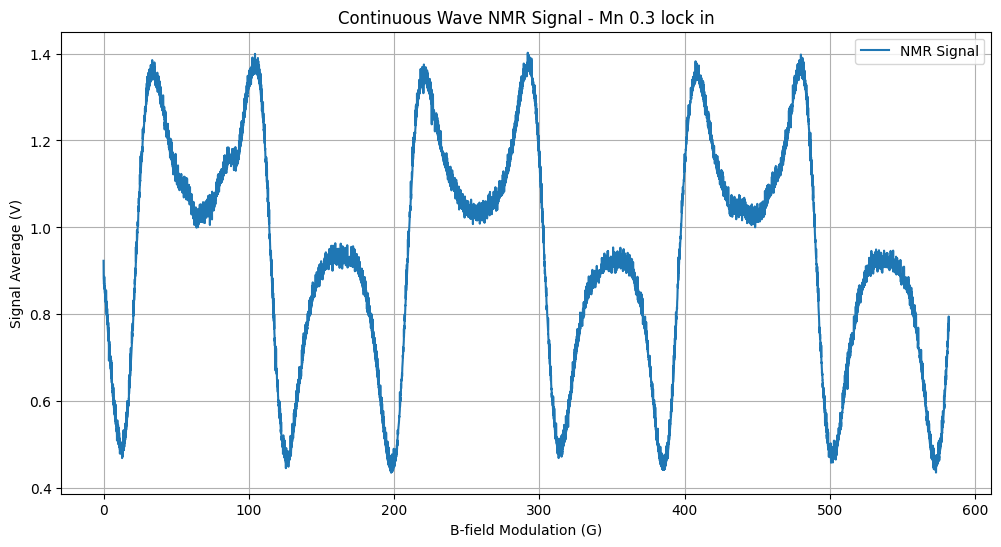


File: glycerin lock in 2
Shape of the NMR data: (8985, 2)
First few rows of the data:
[[0.       0.964078]
 [0.05     0.954409]
 [0.1      0.954087]
 [0.15     0.953603]
 [0.2      0.954731]]


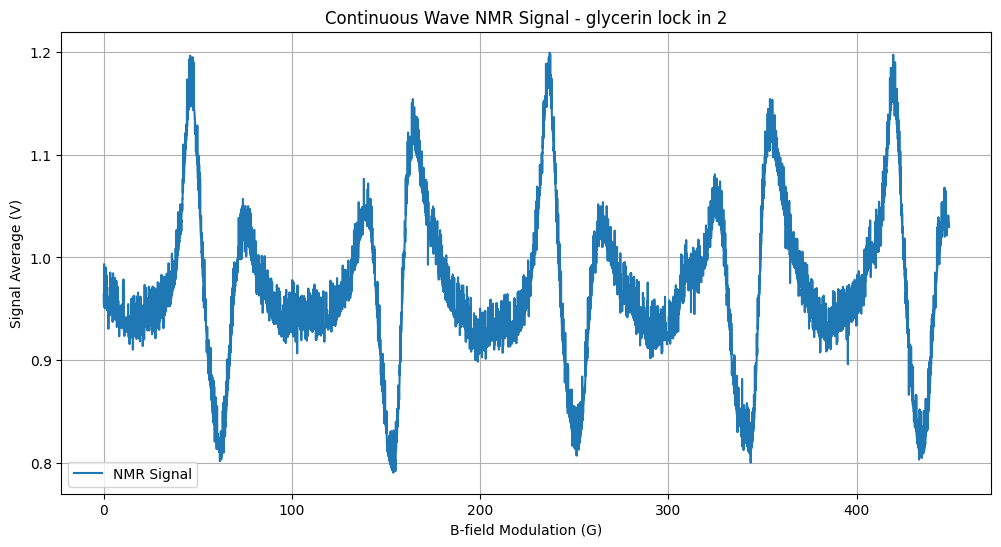


File: Mn 0.1 lock in
Shape of the NMR data: (12045, 2)
First few rows of the data:
[[0.       1.066891]
 [0.05     1.041913]
 [0.1      1.044008]
 [0.15     1.044169]
 [0.2      1.046425]]


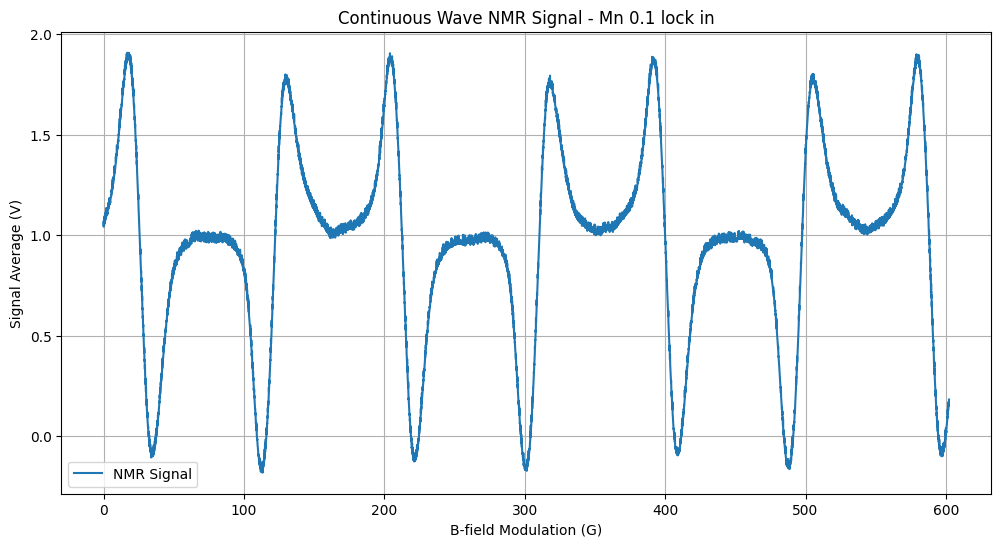


File: glycerin_lock_in
Shape of the NMR data: (13640, 2)
First few rows of the data:
[[0.       0.225213]
 [0.05     0.222151]
 [0.1      0.222312]
 [0.15     0.222796]
 [0.2      0.224085]]


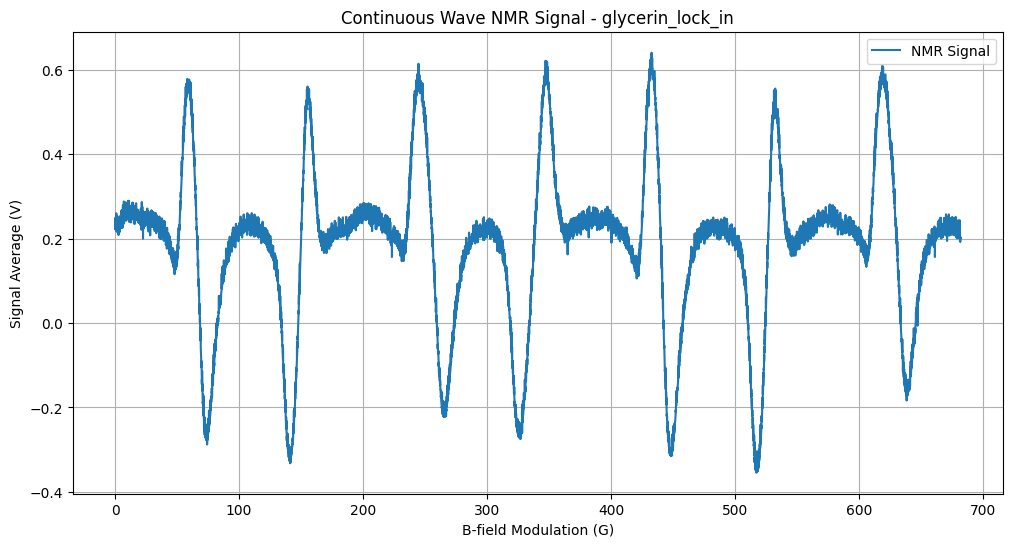


File: Glycerin at Resonance
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.2429 -0.0224]
 [-1.232  -0.0328]
 [-1.2214 -0.0332]
 [-1.211  -0.0339]
 [-1.2008 -0.0349]]


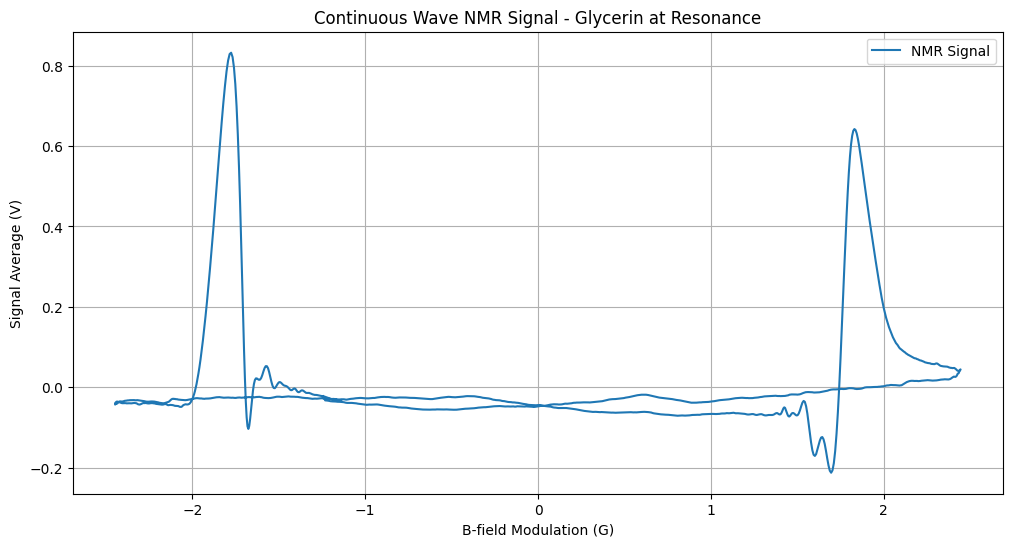


File: Glycerin Above Resonance
Shape of the NMR data: (2, 1667)
First few rows of the data:
[[-0.552  -0.5388 -0.509  ... -0.3702 -0.367  -0.3678]
 [-1.181  -1.1711 -1.1618 ... -1.1131 -1.1063 -1.0996]]


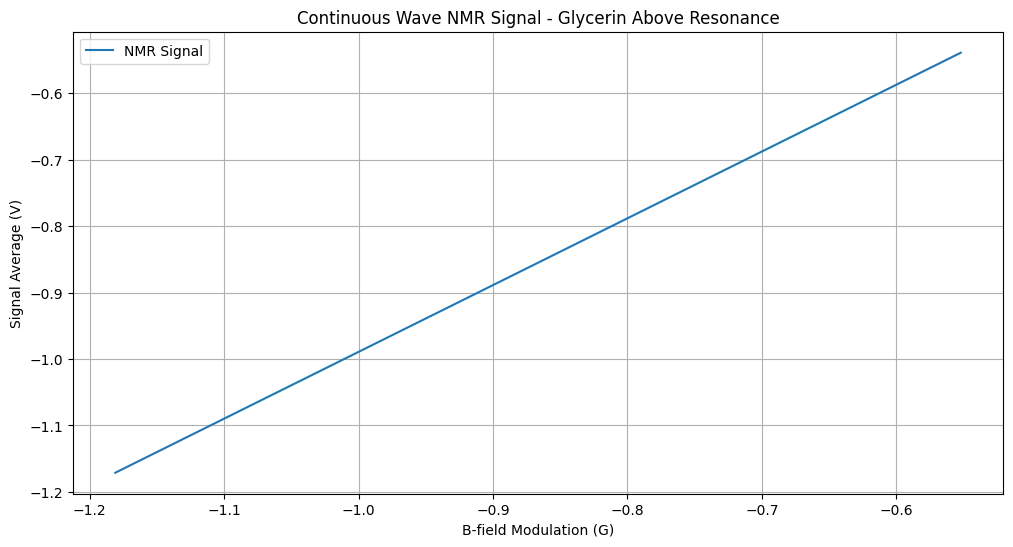


File: 1M Mn Above Resonance
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.2201  0.0343]
 [-1.2087  0.028 ]
 [-1.1976  0.0329]
 [-1.1866  0.0389]
 [-1.1757  0.0449]]


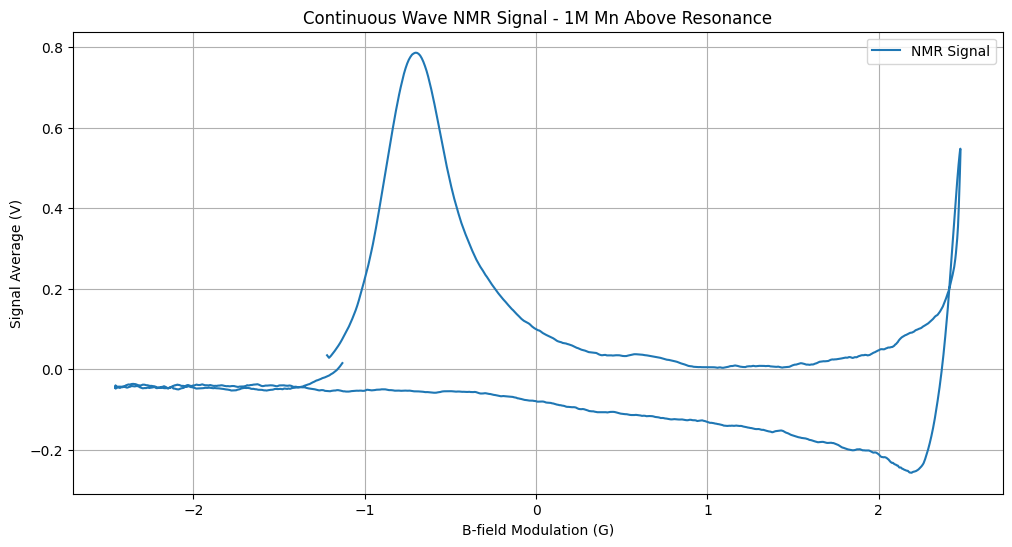


File: Glycerin Below Resonance
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.2394 -0.068 ]
 [-1.2286 -0.0773]
 [-1.2179 -0.0768]
 [-1.2075 -0.0771]
 [-1.1972 -0.077 ]]


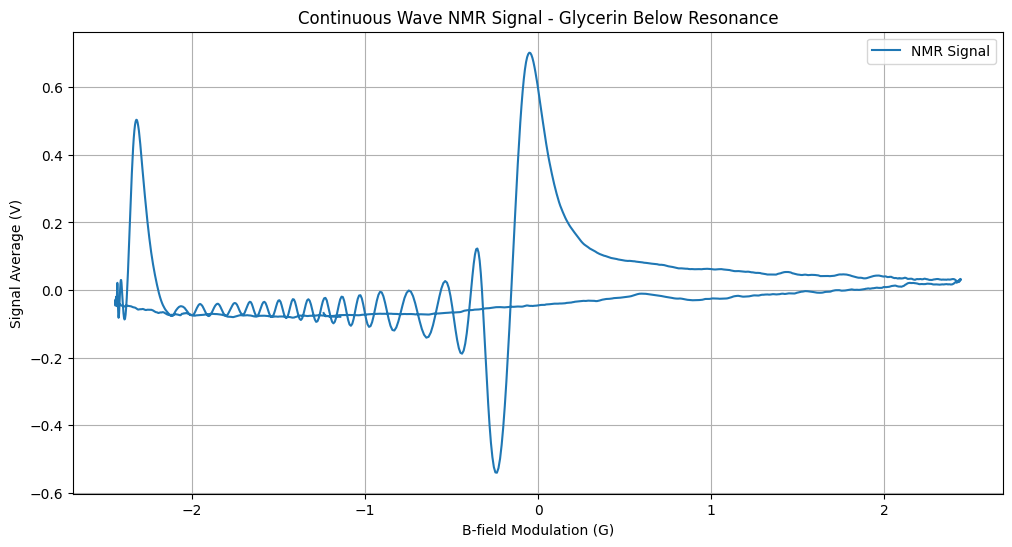


File: 0.01M Mn at Resonance
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.2458 -0.0254]
 [-1.2346 -0.0356]
 [-1.2236 -0.0352]
 [-1.2128 -0.0354]
 [-1.2021 -0.0358]]


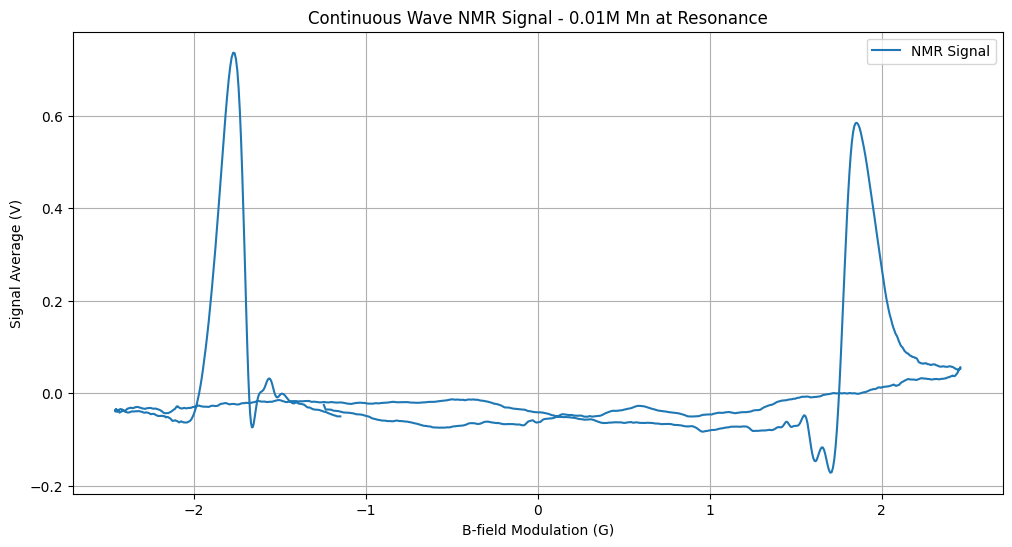


File: 0.1M Mn Above Resonance
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.1727 -0.0747]
 [-1.1615 -0.0872]
 [-1.1506 -0.0871]
 [-1.1398 -0.0875]
 [-1.1292 -0.0877]]


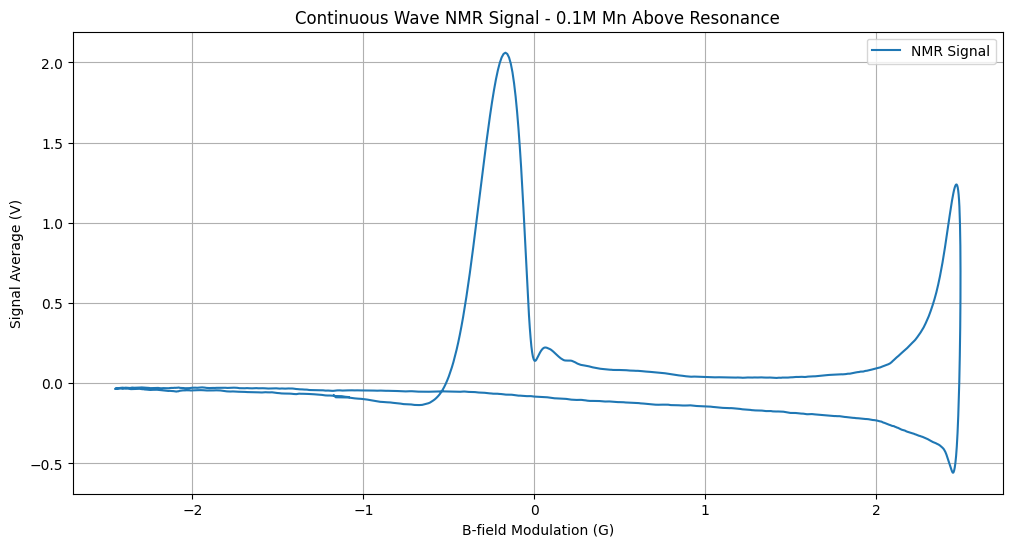


File: 0.01M Mn Above Resonance
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.2096 -0.007 ]
 [-1.1985 -0.0183]
 [-1.1876 -0.0181]
 [-1.1768 -0.0175]
 [-1.1661 -0.0172]]


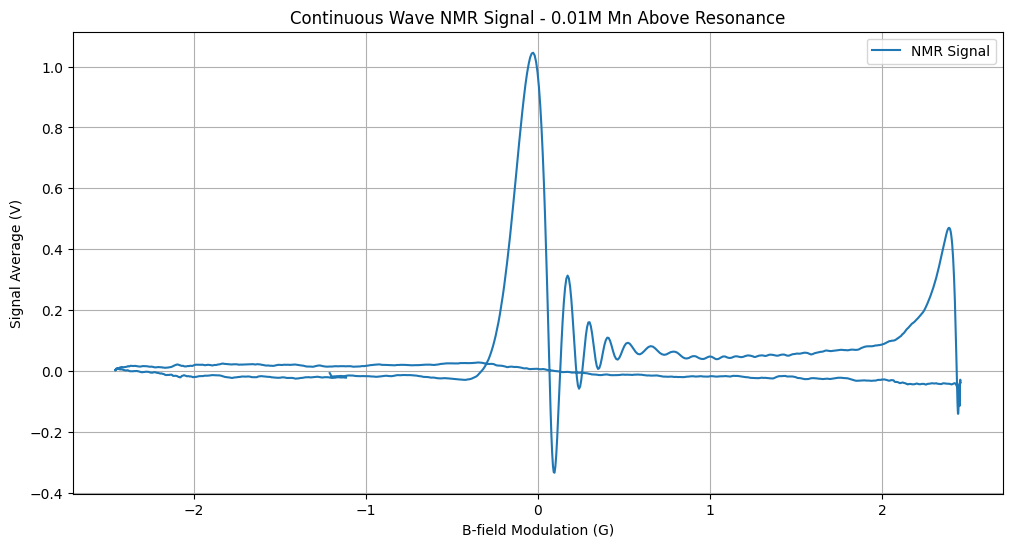


File: 0.01M Mn Below Resonance
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.2419 -0.0659]
 [-1.231  -0.0769]
 [-1.2204 -0.077 ]
 [-1.21   -0.0768]
 [-1.1997 -0.0761]]


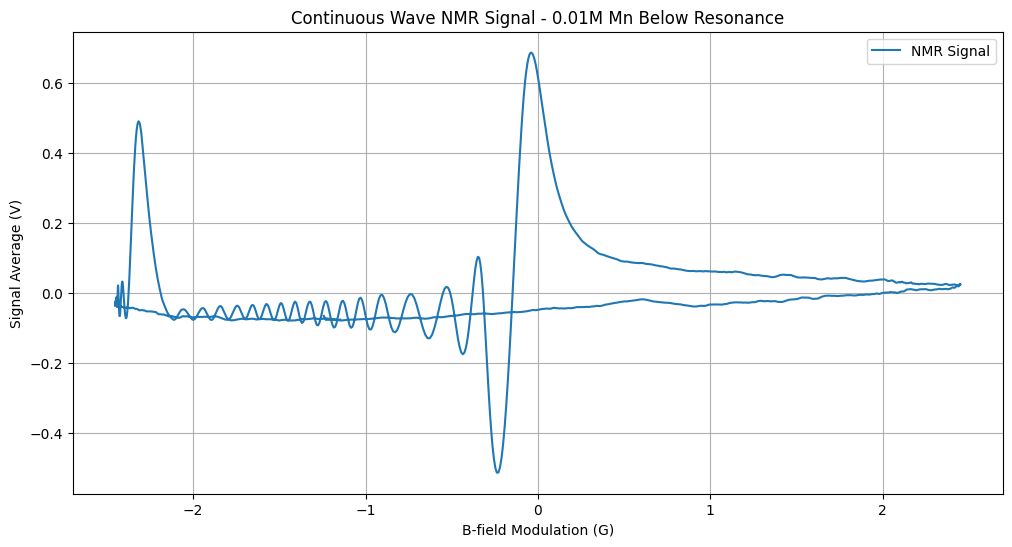


File: 1M Mn Below Resonance (Dispersion)
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.2433 -0.0897]
 [-1.2325 -0.101 ]
 [-1.2219 -0.1017]
 [-1.2114 -0.1015]
 [-1.201  -0.1009]]


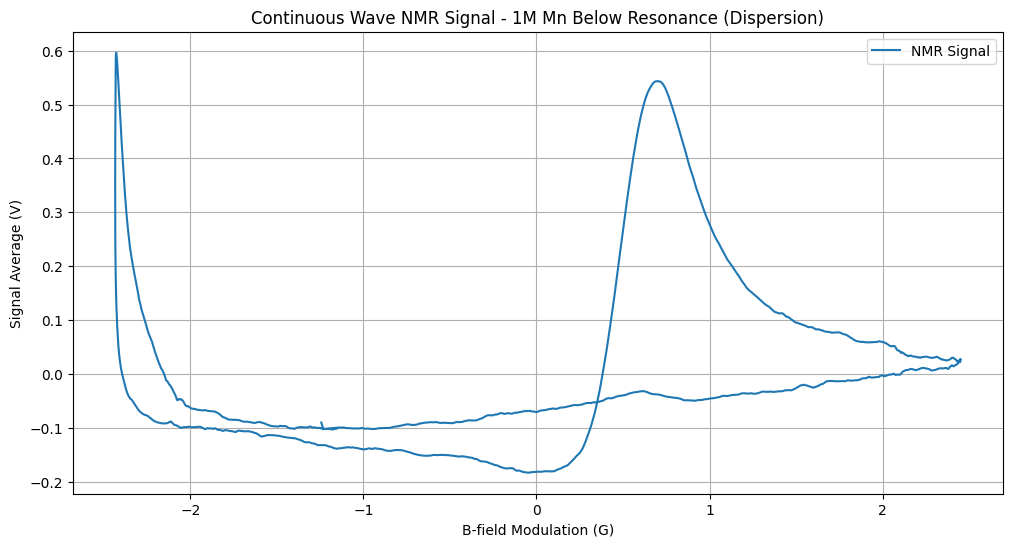


File: 0.1M Mn Below Resonance
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.2448 -0.1131]
 [-1.2341 -0.1264]
 [-1.2235 -0.1269]
 [-1.213  -0.1257]
 [-1.2026 -0.1243]]


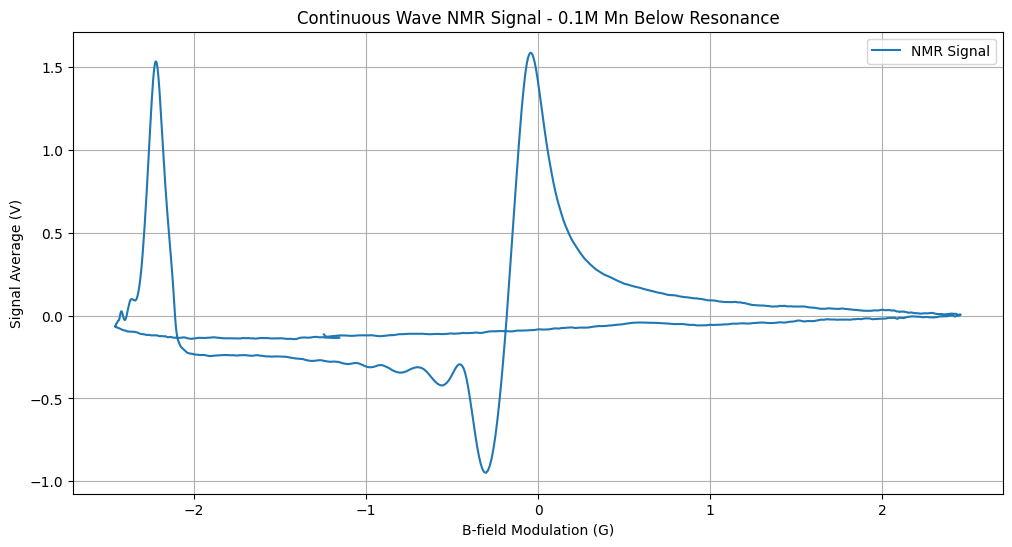


File: 1M Mn at Resonance
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.2446 -0.0102]
 [-1.2337 -0.0217]
 [-1.2229 -0.0217]
 [-1.2122 -0.0217]
 [-1.2018 -0.0218]]


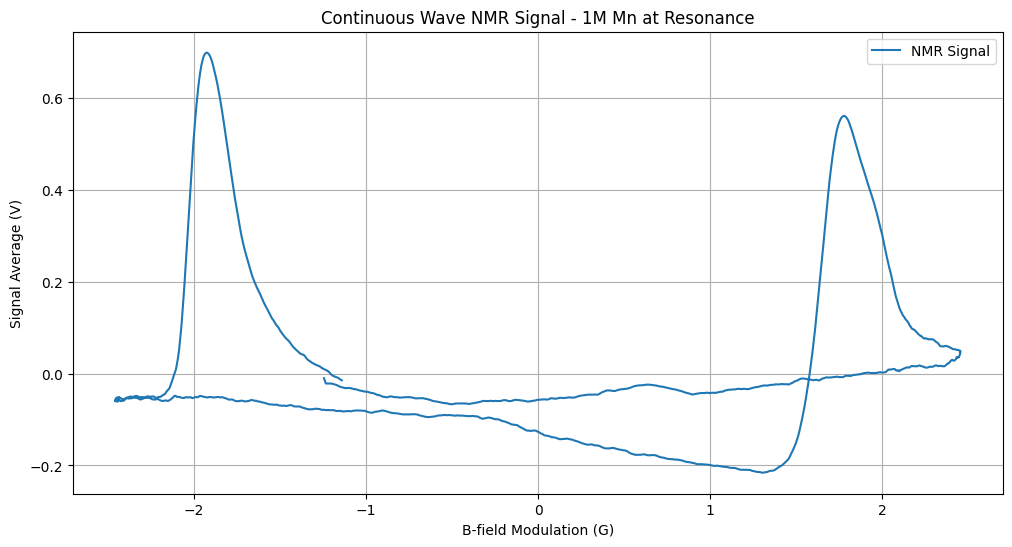


File: 0.1M Mn at Resonance
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.2407  0.004 ]
 [-1.2294 -0.0089]
 [-1.2182 -0.009 ]
 [-1.2073 -0.0087]
 [-1.1964 -0.0082]]


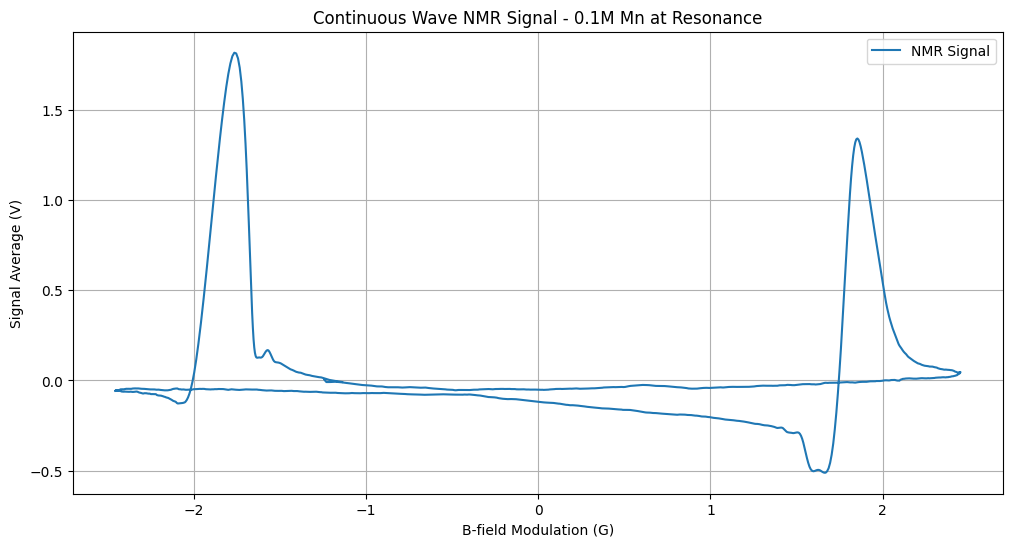


File: 1M Mn Below Resonance (Absorption)
Shape of the NMR data: (1667, 2)
First few rows of the data:
[[-1.2279  0.0451]
 [-1.2168  0.0397]
 [-1.2058  0.0401]
 [-1.1951  0.041 ]
 [-1.1845  0.0411]]


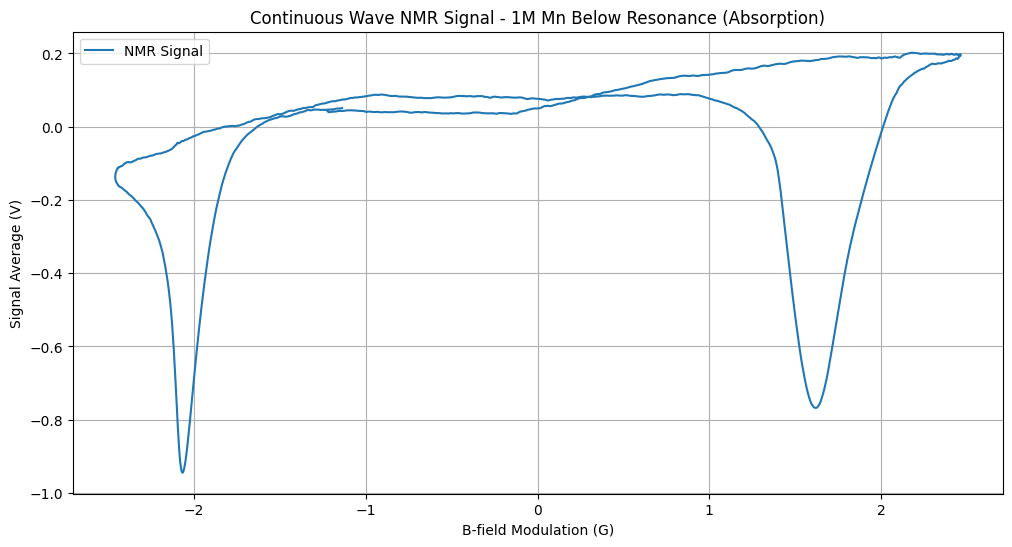

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Specify the folder path
folder_path = "/Users/elias/Desktop/School/Physics111B/NMR/NMR-data/"
subfolder_list = os.listdir(folder_path)

for subfolder_name in subfolder_list:

    if subfolder_name == ".DS_Store" or subfolder_name == "Ignore":
        continue

    subfolder_path = os.path.join(folder_path, subfolder_name)
    
    # Get a list of all files in the folder
    file_list = os.listdir(subfolder_path)

    # Loop through each file in the folder
    for file_name in file_list:
        if file_name == ".DS_Store":
                continue
        # Construct the full path to the file
        file_path = os.path.join(subfolder_path, file_name)

        # Load NMR data
        nmr_data = np.loadtxt(file_path)

        # Display basic information about the data
        print(f"\nFile: {file_name}")
        print("Shape of the NMR data:", nmr_data.shape)
        print("First few rows of the data:")
        print(nmr_data[:5, :])

        # Plot the NMR signal
        time = nmr_data[:, 0]  # Assuming the first column is time
        signal = nmr_data[:, 1]  # Assuming the second column is the NMR signal

        plt.figure(figsize=(12, 6))
        plt.plot(time, signal, label='NMR Signal')
        if subfolder_name == "pulse-data":
            plt.vlines([np.sort(nmr_data[:, :], 1)[0]], 0, np.max(signal), colors = "red")
            plt.title(f'Pulse Wave NMR Signal - {file_name}')
            plt.xlabel('Time (s)')
        else:
            plt.title(f'Continuous Wave NMR Signal - {file_name}')
            plt.xlabel('B-field Modulation (G)')
        plt.ylabel('Signal Average (V)')
        plt.legend()
        plt.grid(True)
        plt.show()